# Understanding NYPD Misconduct Complaints

## 1. Overview
George Floyd's death on June 8th, 2020 sparked a national movement of civil rights protestors led by the Black Lives Matter movement demanding police reform across America.

In New York City, one of the specific demands put forth by activists was to repeal section 50-a of the New York City Civil Rights Law which allowed the NYPD to hide misconduct complaints against NYPD officers from public view. 

On June 12th, Governor Cuomo signed a suite of police transparency bills which repealed 50-a, resulting in a previously hidden record of NYPD misconduct complaints being published for the first time: https://www.nyclu.org/en/campaigns/nypd-misconduct-database

This analysis is an open exploration of what we can learn about police accountability in New York City based on the new availability of this data.

## 2. Approach

#### 2.1 Data Source
This data is pulled directly from the NYCLU's GitHub page here: https://github.com/new-york-civil-liberties-union/NYPD-Misconduct-Complaint-Database

#### 2.2 Column Descriptions
Here are the column descriptions provided by the NYCLU:

**Last Name:** Last name of officer named in the complaint.

**First Name:** First name of officer named in the complaint.

**Officer ID:** This is a unique number the CCRB creates and assigns to each officer about whom it receives a complaint. This number does not correspond to any number the NYPD assigns to officers, such as a badge number.

**Rank:** Current or most recent rank of officer named in complaint (e.g., Captain).
Command: NYPD unit where the named officer is currently or was most recently assigned (e.g., the 5th Precinct).

**Incident ID:** This is a unique number the CCRB assigns to each incident about which it receives a complaint. Multiple officers may be the subject of a complaint about the same incident.

**Incident Date:** Date on which the incident took place.

**Complaint Category:** Category of misconduct within the CCRB’s jurisdiction, which includes Force, Abuse of Authority, Discourtesy, and Offensive Language.

**Allegation:** Short description of the action in the complaint (e.g., Gun Drawn).

**CCRB Finding:** The CCRB’s final evaluation of the complaint. Details can be found on the CCRB website.

**NYPD Finding:** NYPD final disposition of the complaint.

**Penalty:** NYPD penalty given to the officer named in the complaint.

#### 2.3 Additional Reading
For additional information and context on the Civilian Complaint Review Board, please see: 
https://www1.nyc.gov/site/ccrb/index.page

## 3. Data Preparation

### 3.1 Loading Libraries and Data

In [2]:
# Import standard notebook libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

#Set default plot styling
plt.style.use("fivethirtyeight")

In [3]:
#Import the data from CSV
complaints_path = "../nypd-misconduct-complaints/CCRB_database_raw.csv"
complaints = pd.read_csv(complaints_path)
complaints_master = pd.read_csv(complaints_path)

### 3.2 Inspecting Data

In [4]:
#Inspect 5 rows
complaints.head()

,AsOfDate,Unique Id,First Name,Last Name,Rank,Command,ShieldNo,Complaint Id,Incident Date,FADO Type,Allegation,Board Disposition,NYPDDisposition,PenaltyDesc
0,7/14/20,43921,Richard,Aalbue,POM,H BKLYN,3619.0,6290465.0,NaN,Force,Force,Unsubstantiated,NaN,NaN
1,7/14/20,52580,Walter,Aanonsen,LT,MOUNTED,0.0,8300607.0,NaN,Force,Force,Complainant Unavailable,NaN,NaN
2,7/14/20,52580,Walter,Aanonsen,LT,MOUNTED,0.0,8800504.0,2/15/88,Force,Beat,Unsubstantiated,NaN,NaN
3,7/14/20,52580,Walter,Aanonsen,LT,MOUNTED,0.0,9201176.0,4/2/92,Abuse of Authority,Vehicle Searched,Unsubstantiated,NaN,NaN
4,7/14/20,52580,Walter,Aanonsen,LT,MOUNTED,0.0,9201176.0,4/2/92,Discourtesy,Nasty Words,Unsubstantiated,NaN,NaN


In [5]:
#Inspect shape of table
complaints.shape

(323911, 14)

In [6]:
#Inspect count of null values
complaints.isna().sum()

AsOfDate                  0
Unique Id                 0
First Name                5
Last Name                 0
Rank                      0
Command                   0
ShieldNo                 56
Complaint Id          33262
Incident Date         53493
FADO Type             33262
Allegation            33683
Board Disposition     33262
NYPDDisposition      312447
PenaltyDesc          313919
dtype: int64

In [7]:
#Inspect unique values and value counts for Board Disposition
complaints.loc[:,"Board Disposition"].value_counts()

Unsubstantiated                             104855
Exonerated                                   56047
Complainant Uncooperative                    38520
Unfounded                                    26281
Complaint Withdrawn                          15844
Complainant Unavailable                      13862
Substantiated (Charges)                      11151
Alleged Victim Uncooperative                  6016
Substantiated (Command Discipline)            3323
Alleged Victim Unavailable                    2596
Substantiated (No Recommendations)            1853
Closed - Pending Litigation                   1618
Miscellaneous - Subject Retired               1410
Substantiated (Formalized Training)           1134
Substantiated (Command Discipline A)          1052
Miscellaneous                                 1041
Miscellaneous - Subject Resigned               931
Substantiated (Instructions)                   931
Substantiated (Command Discipline B)           893
Victim Unidentified            

In [8]:
#Inspect unique values and value counts for NYPD Disposition
complaints.loc[:,"NYPDDisposition"].value_counts()

Instructions                                              2371
No Disciplinary Action-DUP                                1602
Command Discipline - A                                    1567
Formalized Training                                        993
Command Discipline - B                                     806
Not Guilty - DCT                                           662
APU Guilty                                                 650
APU Not guilty                                             405
Plead Guilty - DCT                                         320
Guilty - DCT                                               318
Charge Dismissed - DCT                                     312
Filed                                                      285
APU - Decision Pending                                     277
No Disciplinary Action-SOL                                 274
APU Closed: Retained, with discipline                       75
No Finding                                             

In [9]:
#Inspect unique values for Penalty Description
complaints.loc[:,"PenaltyDesc"].unique()

array([nan, 'Instruction', 'Command Discipline - A', 'no penalty',
       'Forfeit vacation 5 days', 'Command Discipline - B',
       'Forfeit vacation 4 days', 'Formalized Training', 'No penalty',
       'Command Level Instructions', 'Charges Dismissed - DCT',
       'Vacation days: 15', 'Forfeit vacation 10 days',
       'APU - Decision Pending', 'Vacation days: 10',
       'Forfeit vacation 7 days', 'Suspen. days: 30 + Vacation days: 30',
       'Forfeit vacation 1 days',
       'Command Discipline - B + Command Level Instructions',
       'Vacation days: 10 + Suspen. days: 15', 'Dismissal Probation',
       'Reprimand', 'Forfeit vacation 3 days', 'Not Guilty - DCT',
       'Command Discipline - A + Instruction',
       'Formalized Training + Command Level Instructions',
       'Forfeit vacation 8 days', 'Vacation days: 5',
       'Forfeit vacation 2 days', 'Forfeit vacation', 'Vacation days: 30',
       'Forfeit vacation 12 days', 'Vacation days: 45', 'Resigned',
       'Vacation d

### 3.3 Engineering New Columns

In [10]:
#Engineer new column for "Incident Date"
complaints['Incident Year'] = pd.DatetimeIndex(complaints['Incident Date']).year

In [11]:
#Engineer new column for "Board Substantiated"
board_substantiated = complaints.loc[:,"Board Disposition"].str.contains("Substantiated")
complaints.loc[:,"Board Substantiated"] = board_substantiated

In [12]:
#Engineer new column for "NYPD Substantiated"
disposition_substantiated = complaints.loc[:,"NYPDDisposition"].isin(
       ['Instructions',
        'Command Level Instructions',
        'Formalized Training',
        'Command Discipline - A',
        'Command Discipline - B',
        'Plead Guilty - DCT'
        'Guilty - DCT',
        'Plead Guilty - OATH',
        'Guilty - OATH',
        'APU Instructions',
        'APU Command Discipline',
        'APU Command Discipline B',
        'APU Nolo contendere',
        'APU Retained, with discipline',
        'APU Previously adjudicated, with discipline',
        'APU Closed: Retained, with discipline',
        'APU Closed: Previously adjudicated, with discipline',
        'Negttn-Nolo contendre',
        'Negttn-Guilty',
        ])

penalty_unsubstantiated = complaints.loc[:,"PenaltyDesc"].isnull()
substantiated = disposition_substantiated | ~penalty_unsubstantiated
complaints.loc[:,"NYPD Substantiated"] = substantiated

In [13]:
complaints.head()

,AsOfDate,Unique Id,First Name,Last Name,Rank,Command,ShieldNo,Complaint Id,Incident Date,FADO Type,Allegation,Board Disposition,NYPDDisposition,PenaltyDesc,Incident Year,Board Substantiated,NYPD Substantiated
0,7/14/20,43921,Richard,Aalbue,POM,H BKLYN,3619.0,6290465.0,NaN,Force,Force,Unsubstantiated,NaN,NaN,NaN,False,False
1,7/14/20,52580,Walter,Aanonsen,LT,MOUNTED,0.0,8300607.0,NaN,Force,Force,Complainant Unavailable,NaN,NaN,NaN,False,False
2,7/14/20,52580,Walter,Aanonsen,LT,MOUNTED,0.0,8800504.0,2/15/88,Force,Beat,Unsubstantiated,NaN,NaN,1988.0,False,False
3,7/14/20,52580,Walter,Aanonsen,LT,MOUNTED,0.0,9201176.0,4/2/92,Abuse of Authority,Vehicle Searched,Unsubstantiated,NaN,NaN,1992.0,False,False
4,7/14/20,52580,Walter,Aanonsen,LT,MOUNTED,0.0,9201176.0,4/2/92,Discourtesy,Nasty Words,Unsubstantiated,NaN,NaN,1992.0,False,False


## 4. Cleaning Data

### 4.1 Handle Missing Values

In [14]:
#Handle missing values for Incident Year
percent_missing = complaints.loc[:,'Incident Year'].isnull().sum() * 100 / len(complaints)
percent_missing.round(2)

16.51

In [15]:
#Assess coincidence of missing values for Incident Year with missing values for Board Substantiation

In [16]:
unknown_year = complaints.loc[:,"Incident Year"].isnull()
complaints.loc[unknown_year,:].isnull().sum()

AsOfDate                   0
Unique Id                  0
First Name                 0
Last Name                  0
Rank                       0
Command                    0
ShieldNo                  56
Complaint Id           33262
Incident Date          53493
FADO Type              33262
Allegation             33262
Board Disposition      33262
NYPDDisposition        53493
PenaltyDesc            53493
Incident Year          53493
Board Substantiated    33262
NYPD Substantiated         0
dtype: int64

**Observation 1:** <br>
16% of all complaints occurred at an unknown date.

**Observation 2:** <br>
The complaints where Incident Year is unknown overlap to a high degree with complaints where the allegation and board disposition is also unknown.

**Decision 1:** <br>
These complaints won't be possible to use in any analysis based on the year in which a complaint took place nor the rate at which complaints are substantiated. However, these complaints could still be useful in the context of a count of complaints raised against specific officers.

For this reason, I will plan to create two versions of this table:

- Complaints where Incident Year is known (used for year-by-year and substantiation rate analysis)
- All complaints (used for complaints-per-officer analysis)

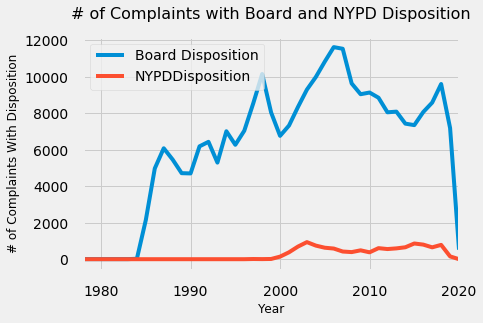

In [17]:
#Assess missing values for Board Disposition and/or NYPD Disposition
complaints_per_year = complaints.groupby(by='Incident Year')[('Board Disposition','NYPDDisposition')].count()
ax = complaints_per_year.plot(figsize=(6,4))

ax.set_title("# of Complaints with Board and NYPD Disposition", fontsize=16,y=1.05)
ax.set_ylabel("# of Complaints With Disposition",fontsize=12)
ax.set_xlabel("Year",fontsize=12)
ax.tick_params(axis='x', pad=15)
ax.tick_params(axis='y', pad=15)

**Observation 1:** <br>
It appears there may have been a change in the process by which complaints are handled around the year 2000. Prior to 2000, there are no values for NYPDDisposition which may suggest that either the Board's Disposition was the final decision regarding whether a misconduct complaint was substantiated or that the NYPD's Disposition was not documented.

**Observation 2:** <br>
It appears there may have been a change in the process by which complaints are handled around the year 2000. Prior to 2000, there are no values for NYPDDisposition which may suggest that either the Board's Disposition was the final decision regarding whether a misconduct complaint was substantiated or that the NYPD's Disposition was not documented.

**Decision:** <br>
For analysis where Incident Year is relevant, I will limit my analysis to misconduct complaints brought in the years 2000-2015 (inclusive).

### 4.2 Scope Final Datasets

Per my observations and decisions above, I will build two final datasets before proceeding with my analysis:

**Filtered Complaints**
- Criteria: Incident Year is between 2000-2015 (inclusive) and is not null
- Usage: Analysis based on annual complaints and substantiation rates
- Notes/Limitations: Removing rows with null data may undercount the total volume of complaints and skew rates of substantiation, etc.

**Total Complaints**
- Criteria: None
- Usage: Analysis based on complaints per officer (agnostic of substantiation)

### 4.3 Build Filtered Complaints

In [18]:
#Drop null values for Incident Date
filtered_complaints = complaints.dropna(axis=0, subset=["Incident Date"])

In [19]:
#Limit complaints to those where Incident Year is 2000-2015 (inclusive)
cond = (filtered_complaints.loc[:,"Incident Year"] > 2014) | (filtered_complaints.loc[:,"Incident Year"] < 2001)
filtered_complaints = filtered_complaints.loc[~cond,:]

### 4.4 Build Total Complaints

In [20]:
#No additional cleaning required for the total_complaints dataset
total_complaints = complaints

## 5 Analyzing Complaints

### 5.1 Annual Complaints

**Question**<br>
How many misconduct complaints are brought per year?

In [21]:
filtered_complaints.shape

(129219, 17)

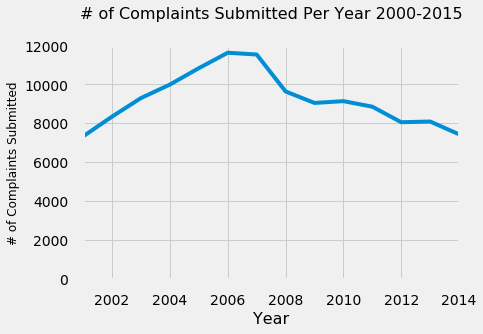

In [22]:
#Group complaints by year then plot
complaints_per_year = filtered_complaints.groupby(by='Incident Year')['Complaint Id'].count()
ax = complaints_per_year.plot(figsize=(6,4))

ax.set_title("# of Complaints Submitted Per Year 2000-2015", fontsize=16,y=1.09)
ax.set_ylabel("# of Complaints Submitted",fontsize=12)
ax.set_xlabel("Year",fontsize=16)
ax.set_ylim(0,12_000)
ax.tick_params(axis='x', pad=15)
ax.tick_params(axis='y', pad=15)

**Question**<br>
How does the number of complaints vary by type?

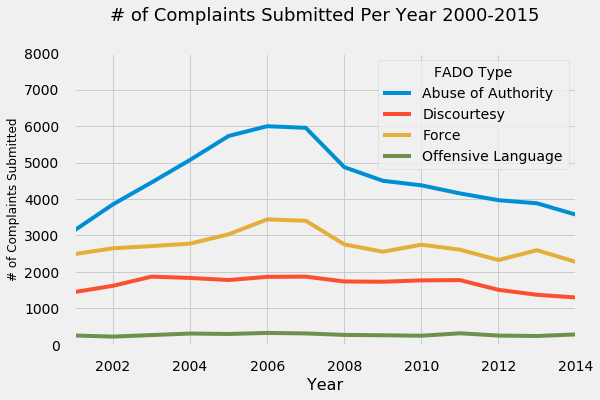

In [23]:
#Group complaints by year and type then plot
complaints_per_year_by_type = filtered_complaints.groupby(by=['Incident Year',"FADO Type"])['Complaint Id'].count().unstack()
ax = complaints_per_year_by_type.plot(figsize=(8,5))

ax.set_title("# of Complaints Submitted Per Year 2000-2015", fontsize=18,y=1.09)
ax.set_ylabel("# of Complaints Submitted",fontsize=12)
ax.set_xlabel("Year",fontsize=16)
ax.set_ylim(0,8_000)
ax.tick_params(axis='x', pad=15)
ax.tick_params(axis='y', pad=15);

**Takeaways**<br>
- There are typically between 8,000 and 10,000 misconduct complaints brought against the NYPD annually
- Abuse of Authority is the most common complaint category followed by Force, then Discourtesy, then Offensive Language
- The number of annual complaints gradually rose from 2000 to 2006 and then gradually declined from 2006 to 2015

### 5.2 Substantiation Rates

**Question**<br>
On an annual basis, how many misconduct complaints are raised, how many are substantiated by the CCRB, and how many are substantiated by the NYPD?

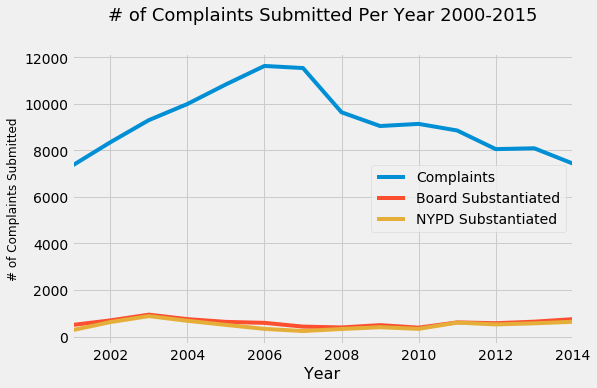

In [24]:
#Group complaints by year
annual_complaints = filtered_complaints.groupby(by='Incident Year')['Complaint Id'].count()
annual_complaints = annual_complaints.reset_index()

#Group complaints by year and board substantiation
board_sub = filtered_complaints.groupby(by=['Incident Year','Board Substantiated'])['Complaint Id'].count().unstack()
board_sub = board_sub.reset_index()

#Group complaints by year and board substantiation
nypd_sub = filtered_complaints.groupby(by=['Incident Year','NYPD Substantiated'])['Complaint Id'].count().unstack()
nypd_sub.reset_index()

#Join the three above tables together
annual_complaints = annual_complaints.merge(board_sub,how='left',on="Incident Year").merge(nypd_sub,how='left',on="Incident Year")

#Remove the columns for unsubstantiated complaints
annual_complaints = annual_complaints.drop(columns=["False_x","False_y"],axis=1)

#Rename columns and plot
annual_complaints.columns=(["Incident Year","Complaints","Board Substantiated","NYPD Substantiated"])
ax = annual_complaints.plot(x="Incident Year",figsize=(8,5))
ax.set_title("# of Complaints Submitted Per Year 2000-2015", fontsize=18,y=1.09)
ax.set_ylabel("# of Complaints Submitted",fontsize=12)
ax.set_xlabel("Year",fontsize=16);

**Question**<br>
What is the average rate of substantiation by allegation type?

In [25]:
#Group complaints by allegation type
complaints_by_type = filtered_complaints.groupby(by='FADO Type')['Complaint Id'].count()
complaints_by_type = complaints_by_type.reset_index()

#Calculate % of complaints by type
complaints_by_type.loc[:,"Complaint %"] = round(((complaints_by_type['Complaint Id'] / complaints_by_type['Complaint Id'].sum()) * 100),2)

#Group complaints by allegation type and board substantiation
board_sub = filtered_complaints.groupby(by=['FADO Type','Board Substantiated'])['Complaint Id'].count().unstack()
board_sub = board_sub.reset_index()

#Group complaints by allegation type and nypd substantiation
nypd_sub = filtered_complaints.groupby(by=['FADO Type','NYPD Substantiated'])['Complaint Id'].count().unstack()
nypd_sub.reset_index()

#Join the three above tables together
complaints_by_type = complaints_by_type.merge(board_sub,how='inner',on="FADO Type").merge(nypd_sub,how='inner',on="FADO Type")

#Remove the columns for unsubstantiated complaints
complaints_by_type = complaints_by_type.drop(columns=["False_x","False_y"],axis=1)

#Rename columns
complaints_by_type.columns=(["FADO Type","Complaints","Complaints %","Board Substantiated","NYPD Substantiated"]);

In [26]:
board_sub_rate = complaints_by_type.loc[:,"Board Substantiated"] / complaints_by_type.loc[:,"Complaints"]*100
complaints_by_type.loc[:,"Board Substantiation Rate (%)"] = round(board_sub_rate,2)

nypd_confirmation_rate = complaints_by_type.loc[:,"NYPD Substantiated"] / complaints_by_type.loc[:,"Board Substantiated"]*100
complaints_by_type.loc[:,"NYPD Confirmation Rate (%)"] = round(nypd_confirmation_rate,2)

nypd_sub_rate = complaints_by_type.loc[:,"NYPD Substantiated"] / complaints_by_type.loc[:,"Complaints"]*100
complaints_by_type.loc[:,"NYPD Substantiation Rate (%)"] = round(nypd_sub_rate,2)

In [27]:
complaints_by_type.sort_values("Complaints",ascending=False)

,FADO Type,Complaints,Complaints %,Board Substantiated,NYPD Substantiated,Board Substantiation Rate (%),NYPD Confirmation Rate (%),NYPD Substantiation Rate (%)
0,Abuse of Authority,63524,49.16,6222,5202,9.79,83.61,8.19
2,Force,38358,29.68,958,698,2.50,72.86,1.82
1,Discourtesy,23470,18.16,1018,858,4.34,84.28,3.66
3,Offensive Language,3867,2.99,135,115,3.49,85.19,2.97


**Takeaways**<br>
- The CCRB substantiates misconduct complaints at different rates for different allegation types
- On the low end, the CCRB substantiates allegations of Force 2.5% of the time
- On the high end, the CCRB substantitates allegations of Abuse of Authority 9.79% of the time
- The NYPD consistently confirms the CCRB's findings between 70-80% of the time
- This brings the overall substantiation rate for NYPD misconduct complaints to 1.8 - 8.2% depending on allegation type

### 5.3 Penalties for Substantiated Misconduct

**Question**<br>
What are the most common penalties given to officers with substantiated misconduct claims against them?

In [28]:
#Filter out unsubstantiated complaints
cond = filtered_complaints.loc[:,'PenaltyDesc'].isnull()
substantiated_complaints = filtered_complaints.loc[~cond,:]

#Create new column for categorized Penalty Type based on Penalty Description
substantiated_complaints.loc[:,"PenaltyType"] = pd.np.where(substantiated_complaints.PenaltyDesc.str.contains('Resigned'),'Resigned',
            pd.np.where(substantiated_complaints.PenaltyDesc.str.contains('Suspen'),'Suspended',
                        pd.np.where(substantiated_complaints.PenaltyDesc.str.contains('Vacation'),'Vacation',
                                    pd.np.where(substantiated_complaints.PenaltyDesc.str.contains('Command'),'Command Discipline',
                                          pd.np.where(substantiated_complaints.PenaltyDesc.str.contains('Instruction'),'Instructions',        
            'Other')))))

# Create new dataframe with Penalty, Counts, and Percentage of Total
penalty_types = substantiated_complaints.loc[:,"PenaltyType"].value_counts().rename_axis('Penalty').to_frame(name='Counts')
penalty_types.loc[:,'Percentage of Total'] = round((penalty_types.loc[:,'Counts'] / penalty_types.loc[:,'Counts'].sum() * 100),2)
penalty_types

/Users/lwhitney/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/lwhitney/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Counts,Percentage of Total
Penalty,,
Instructions,2058,30.65
Other,2007,29.89
Command Discipline,1922,28.62
Vacation,653,9.72
Suspended,59,0.88
Resigned,16,0.24


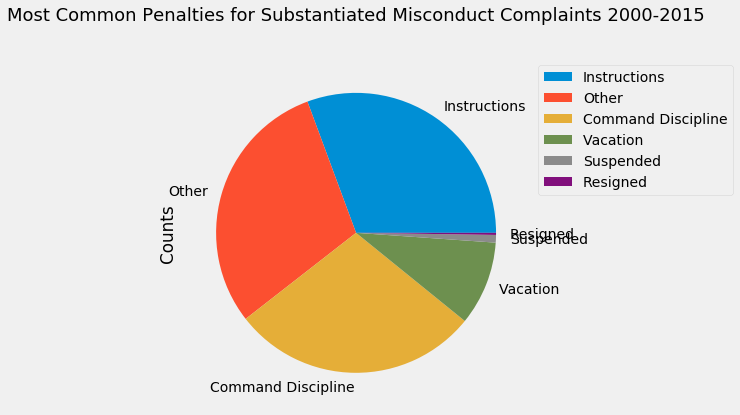

In [29]:
ax = penalty_types.plot.pie(y="Counts",figsize=(6,6))
plt.legend(bbox_to_anchor=(1,1))
ax.set_title("Most Common Penalties for Substantiated Misconduct Complaints 2000-2015", fontsize=18,y=1.09);

### 5.4 Summary of Findings (Analyzing Complaints)

When a civilian brings a misconduct about the NYPD, there's a > 90% chance that complaints will not be substantiated. This reduces the incentive to bring about a complaint given the low rate of substantiation. Moreover, even if a complaint is substantiated, by far most common penalties that officers face include Instruction and Command Discipline typically don't carry consequences to an officer's pay, vacation, or standing: https://www1.nyc.gov/site/ccrb/prosecution/police-discipline.page.

As such, an initial analysis suggests that:
- The CCRB was not effective during the period of analysis in substantiating complaints of misconduct against the NYPD
- The low rate of substantiation may have an effect that civilians who face misconduct are less likely to formally file a complaint
- The low substantiation rate suggests the misconduct review process may not be an effective deterrent against misconduct
- The low-level penalties faced by officers suggests the current review process may not be an effective deterrent against misconduct
- These findings fit the current cultural narrative that there is a low level of accountability between police officers and the general public